<a href="https://colab.research.google.com/github/Aszad-Hossain-Akib/Python-basic/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install ipywidgets

In [8]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [9]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

{'status': 'ok', 'restart': True}

In [2]:
boston_df=pd.read_csv(boston_url)

In [8]:
!pip install numpy pandas seaborn
# %%
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import the pyplot module and assign it to the alias 'plt'
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
# %%
import io
import requests
#use requests to get data from URL
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = requests.get(URL)
boston_url = io.BytesIO(resp.content)

In [9]:
# Import the necessary module
import scipy.stats as stats # Import scipy.stats and assign it to the alias 'stats'

# ... (rest of your code) ...

# T-test for the difference in MEDV between houses bounded by the Charles River (CHAS)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(group1, group2) # Use the alias 'stats' to access ttest_ind
print("T-test Results: t-statistic =", t_stat, ", p-value =", p_value)

# ... (rest of your code) ...

# ANOVA for the difference in MEDV across AGE groups
anova_result = stats.f_oneway( # Use the alias 'stats' to access f_oneway
    boston_df[boston_df['AGE_GROUP'] == "35 and younger"]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == "36-70"]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == "70 and older"]['MEDV']
)

print("ANOVA Results: F-statistic =", anova_result.statistic, ", p-value =", anova_result.pvalue)

# ... (rest of your code) ...

# Pearson correlation for NOX and INDUS
correlation, _ = stats.pearsonr(boston_df['NOX'], boston_df['INDUS']) # Use the alias 'stats' to access pearsonr
print("Pearson Correlation between NOX and INDUS:", correlation)


T-test Results: t-statistic = 3.996437466090509 , p-value = 7.390623170519905e-05
ANOVA Results: F-statistic = 36.40764999196599 , p-value = 1.7105011022702984e-15
Pearson Correlation between NOX and INDUS: 0.763651446920915


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_GROUP   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.1 KB
None
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000 

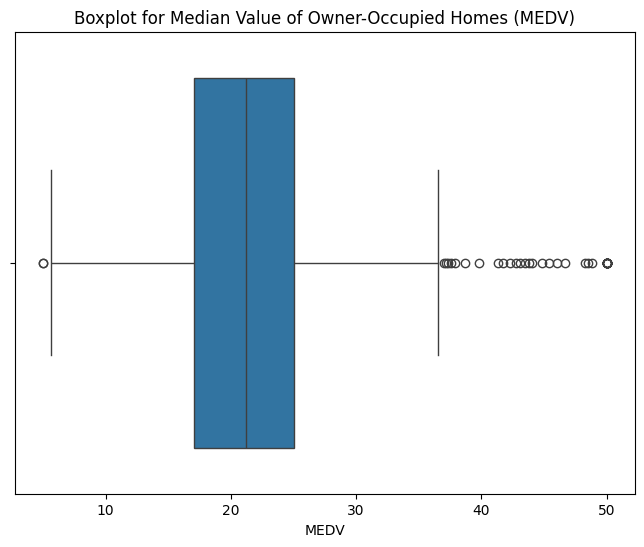

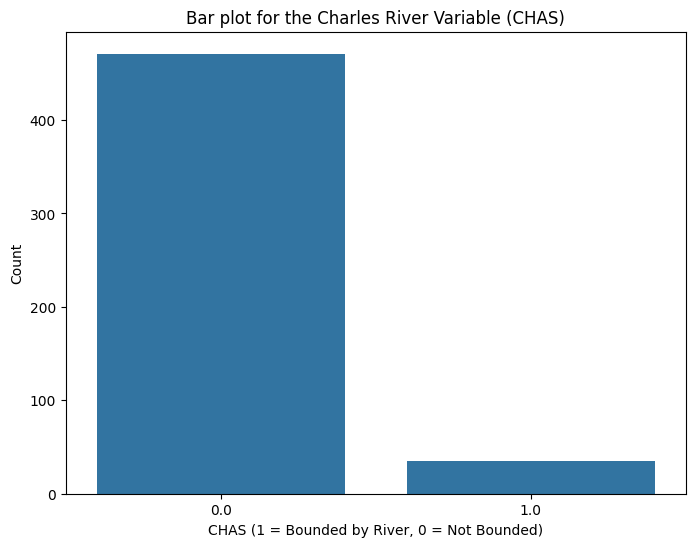

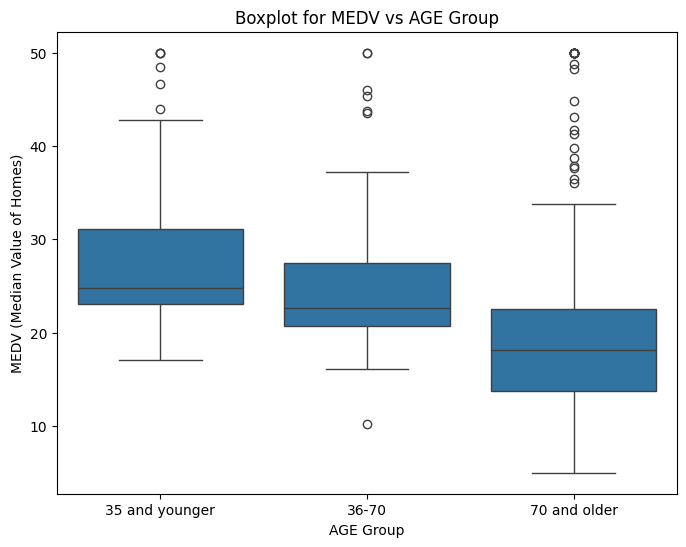

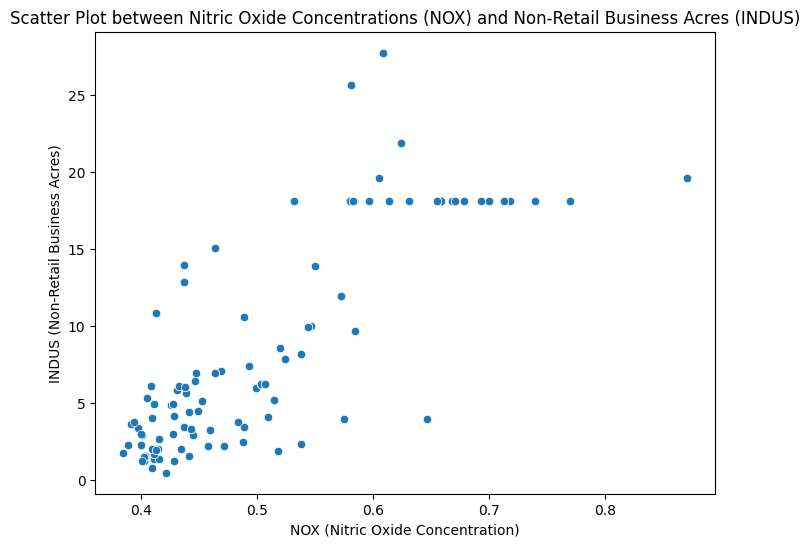

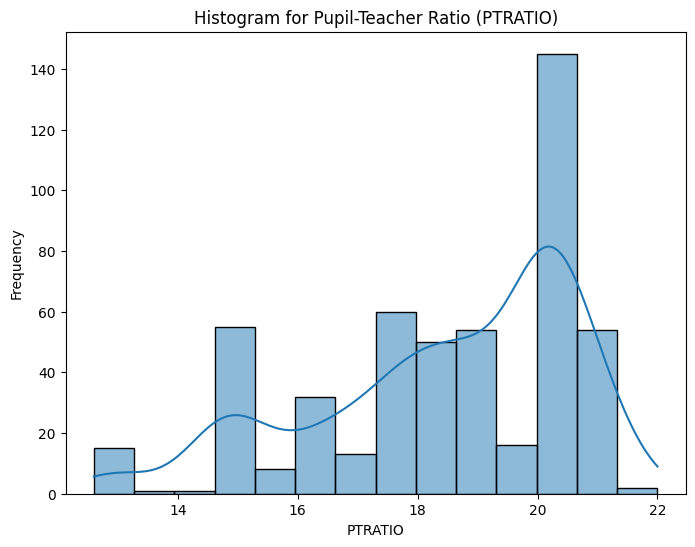

T-test Results: t-statistic = 3.996437466090509 , p-value = 7.390623170519905e-05
Reject H0: There is a significant difference in the median value of houses bounded by the Charles River.
ANOVA Results: F-statistic = 36.40764999196599 , p-value = 1.7105011022702984e-15
Reject H0: There is a significant difference in MEDV across the AGE groups.
Pearson Correlation between NOX and INDUS: 0.763651446920915
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        12:01:05   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   B

In [10]:
# Display basic information about the dataset
print(boston_df.info())

# Basic statistics for the dataset
print(boston_df.describe())

# Task 2: Visualizations

# Boxplot for Median Value of Owner-Occupied Homes (MEDV)
plt.figure(figsize=(8,6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
plt.xlabel('MEDV')
plt.show()

# Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(8,6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar plot for the Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 = Bounded by River, 0 = Not Bounded)')
plt.ylabel('Count')
plt.show()

# Discretizing the AGE variable into three groups: 35 and younger, 36-70, and older than 70
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=["35 and younger", "36-70", "70 and older"])

# Boxplot for MEDV vs AGE Group
plt.figure(figsize=(8,6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
plt.title('Boxplot for MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV (Median Value of Homes)')
plt.show()

# Scatter plot to show relationship between NOX and INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot between Nitric Oxide Concentrations (NOX) and Non-Retail Business Acres (INDUS)')
plt.xlabel('NOX (Nitric Oxide Concentration)')
plt.ylabel('INDUS (Non-Retail Business Acres)')
plt.show()

# Histogram for the pupil-teacher ratio variable (PTRATIO)
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], kde=True)
plt.title('Histogram for Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

# Task 3: Statistical Tests

# T-test for the difference in MEDV between houses bounded by the Charles River (CHAS)
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-test Results: t-statistic =", t_stat, ", p-value =", p_value)

# Null Hypothesis (H0): There is no difference in the median value of houses bounded by the Charles River.
# Alternative Hypothesis (H1): There is a difference in the median value of houses bounded by the Charles River.

if p_value < 0.05:
    print("Reject H0: There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("Fail to Reject H0: There is no significant difference in the median value of houses bounded by the Charles River.")

# ANOVA for the difference in MEDV across AGE groups
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_GROUP'] == "35 and younger"]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == "36-70"]['MEDV'],
    boston_df[boston_df['AGE_GROUP'] == "70 and older"]['MEDV']
)

print("ANOVA Results: F-statistic =", anova_result.statistic, ", p-value =", anova_result.pvalue)

# Null Hypothesis (H0): There is no difference in MEDV across the AGE groups.
# Alternative Hypothesis (H1): There is a difference in MEDV across the AGE groups.

if anova_result.pvalue < 0.05:
    print("Reject H0: There is a significant difference in MEDV across the AGE groups.")
else:
    print("Fail to Reject H0: There is no significant difference in MEDV across the AGE groups.")

# Pearson correlation for NOX and INDUS
correlation, _ = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson Correlation between NOX and INDUS:", correlation)

# Linear regression for the impact of DIS on MEDV
X = boston_df['DIS']
y = boston_df['MEDV']

# Add constant term for the regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())
